### Import the necessary libraries for MRA - Milestone 1 project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro 
sns.set_palette('deep')
sns.set(color_codes='True')

# Problem 1

## An automobile parts manufacturing company has collected data of transactions for 3 years. They do not have any in-house data science team; thus, they have hired you as their consultant. Your job is to use your magical data science skills to provide them with suitable insights about their data and their customers.


## Determine executive summary of data

In [2]:
#import the dataset and check first 5 records
df = pd.read_excel('Sales_Data.xlsx')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [3]:
# check last 5 records
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
2746,10414,47,65.52,9,3079.44,2020-05-06,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,Yoshido,Juri,Medium


In [4]:
#Shape of the dataset
df.shape

(2747, 20)

In [5]:
# Check for null values
print('Number of null values: {}'.format(df.isnull().sum().sum()))

Number of null values: 0


In [6]:
# Check for duplicates
print('Number of duplicate rows: {}'.format(df.duplicated().sum()))

Number of duplicate rows: 0


In [7]:
# concise data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

## EDA - Univariate Analysis

In [8]:
# create function eda_calc to determine Range,IQR,Qmin,Qmax values
def eda_calc():
    df_desc['Range'] = df_desc['max'] - df_desc['min']
    df_desc['IQR'] = df_desc['75%'] - df_desc['25%']
    IQR_mult = np.where(df_desc['50%'] == df_desc['25%'],1,1.5)
    df_desc['Qmin'] = np.where((df_desc['25%'] - IQR_mult * df_desc['IQR']) < df_desc['min'],df_desc['min'],(df_desc['25%'] - IQR_mult * df_desc['IQR']))
    df_desc['Qmax'] = np.where((df_desc['75%'] + IQR_mult * df_desc['IQR']) > df_desc['max'],df_desc['max'],(df_desc['75%'] + IQR_mult * df_desc['IQR']))

In [9]:
#Determine central values of measure for SALES column
df_desc = pd.DataFrame(df['SALES'].describe()).T
eda_calc()
np.round(df_desc)

,count,mean,std,min,25%,50%,75%,max,Range,IQR,Qmin,Qmax
SALES,2747.0,3553.0,1839.0,482.0,2204.0,3185.0,4503.0,14083.0,13601.0,2299.0,482.0,7951.0


In [10]:
#Determine central values of measure for MSRP column
df_desc = pd.DataFrame(df['MSRP'].describe()).T
eda_calc()
np.round(df_desc)

,count,mean,std,min,25%,50%,75%,max,Range,IQR,Qmin,Qmax
MSRP,2747.0,101.0,40.0,33.0,68.0,99.0,124.0,214.0,181.0,56.0,33.0,208.0


In [11]:
#Determine central values of measure for PRICEEACH column
df_desc = pd.DataFrame(df['PRICEEACH'].describe()).T
eda_calc()
np.round(df_desc)

,count,mean,std,min,25%,50%,75%,max,Range,IQR,Qmin,Qmax
PRICEEACH,2747.0,101.0,42.0,27.0,69.0,96.0,127.0,253.0,226.0,58.0,27.0,215.0


In [12]:
#Determine central values of measure for QUANTITYORDERED column
df_desc = pd.DataFrame(df['QUANTITYORDERED'].describe()).T
eda_calc()
np.round(df_desc)

,count,mean,std,min,25%,50%,75%,max,Range,IQR,Qmin,Qmax
QUANTITYORDERED,2747.0,35.0,10.0,6.0,27.0,35.0,43.0,97.0,91.0,16.0,6.0,67.0


In [13]:
#Determine central values of measure for DAYS_SINCE_LASTORDER column
df_desc = pd.DataFrame(df['DAYS_SINCE_LASTORDER'].describe()).T
eda_calc()
np.round(df_desc)

,count,mean,std,min,25%,50%,75%,max,Range,IQR,Qmin,Qmax
DAYS_SINCE_LASTORDER,2747.0,1757.0,819.0,42.0,1077.0,1761.0,2436.0,3562.0,3520.0,1360.0,42.0,3562.0


In [14]:
# Describe categorical variable - COUNTRY
df_desc = pd.DataFrame(df['COUNTRY'].describe()).T
df_desc

,count,unique,top,freq
COUNTRY,2747,19,USA,928


In [15]:
# Describe categorical variable - CITY
df_desc = pd.DataFrame(df['CITY'].describe()).T
df_desc

,count,unique,top,freq
CITY,2747,71,Madrid,304


In [16]:
# Describe categorical variable - DEALSIZE
df_desc = pd.DataFrame(df['DEALSIZE'].describe()).T
df_desc

,count,unique,top,freq
DEALSIZE,2747,3,Medium,1349


In [17]:
# Describe categorical variable - PRODUCTCODE
df_desc = pd.DataFrame(df['PRODUCTCODE'].describe()).T
df_desc

,count,unique,top,freq
PRODUCTCODE,2747,109,S18_3232,51


In [18]:
# Describe categorical variable - PRODUCTLINE
df_desc = pd.DataFrame(df['PRODUCTLINE'].describe()).T
df_desc

,count,unique,top,freq
PRODUCTLINE,2747,7,Classic Cars,949


In [19]:
# Describe categorical variable - STATUS
df_desc = pd.DataFrame(df['STATUS'].describe()).T
df_desc

,count,unique,top,freq
STATUS,2747,6,Shipped,2541


## EDA - Bivariate Analysis

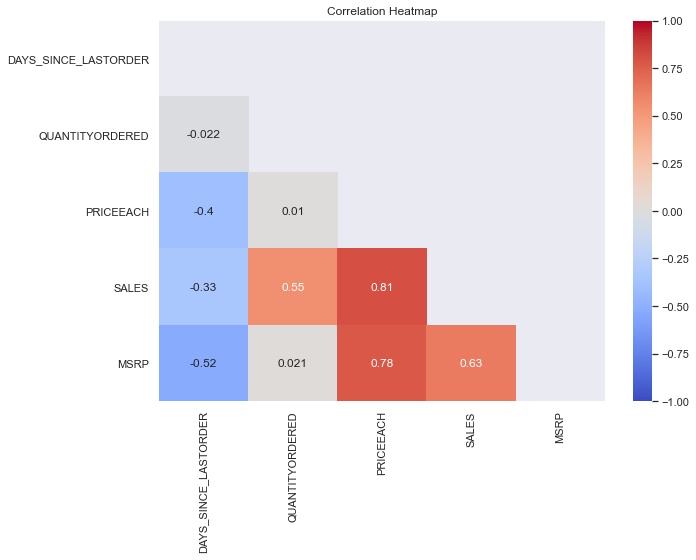

In [20]:
#Plot a heatmap of correlation between variables
plt.figure(figsize=(10,7))
corr = df[['DAYS_SINCE_LASTORDER','QUANTITYORDERED','PRICEEACH','SALES','MSRP']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
corr_tab = sns.heatmap(corr,annot=True,vmin=-1,vmax = 1,mask=mask,cmap='coolwarm')
plt.title('Correlation Heatmap');

<Figure size 1080x720 with 0 Axes>

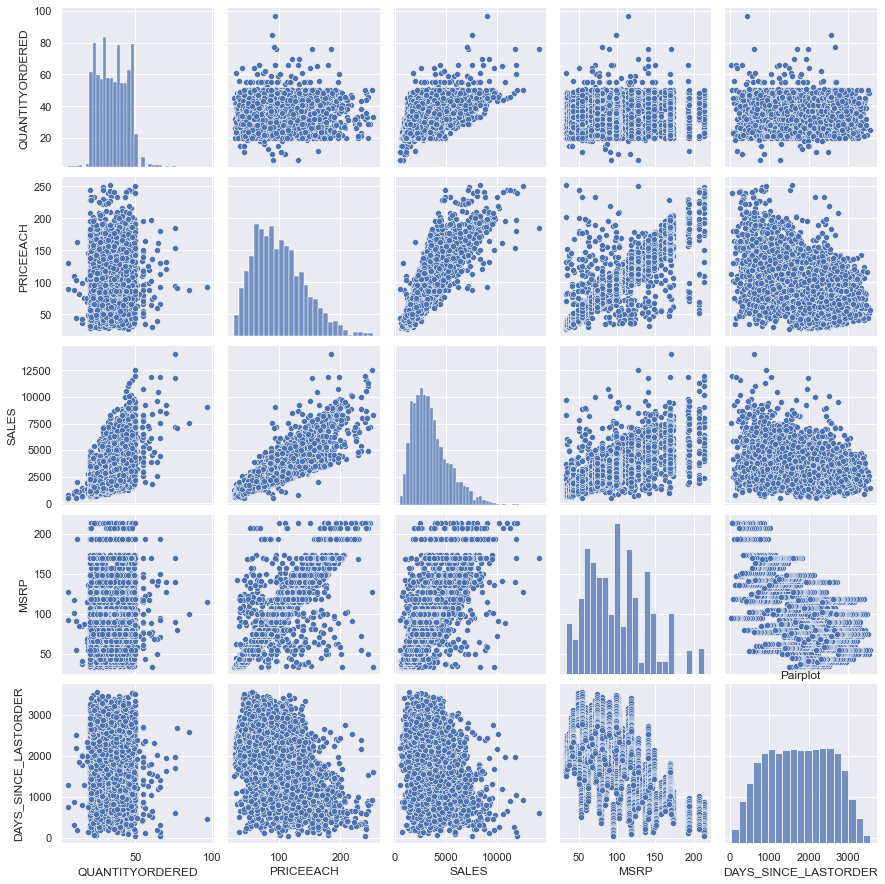

In [21]:
#Plot a pairplot
plt.figure(figsize=(15,10))
sns.pairplot(df[['QUANTITYORDERED','PRICEEACH','SALES','MSRP','DAYS_SINCE_LASTORDER']]);
plt.title('Pairplot');

In [22]:
# Determine the maximum order date to calculate RECENCY against.
df['ORDERDATE'].max()

Timestamp('2020-05-31 00:00:00')

## Read the RFM data created from KNIME and create the RFM crosstab table to identify
## the customer segments

In [23]:
# Read the RFM dataset
df_RFM = pd.read_excel("Sales_Data_RFM.xlsx")
df_RFM.head()

C:\Users\soorej.balan\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,RECENCY_VAR,FREQUENCY_VAR,MONETARY_VAR,RECENCY_VAR [Binned],FREQUENCY_VAR [Binned],MONETARY_VAR [Binned],RECENCY,FREQUENCY,MONETARY,RFM
0,"AV Stores, Co.",(171) 555-1555,Fauntleroy Circus,Manchester,EC2 5NT,UK,Ashworth,Victoria,196,3,157807.81,Bin 2,Bin 2,Bin 3,2,2,3,223
1,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,64,3,70488.44,Bin 1,Bin 2,Bin 1,3,2,1,321
2,Amica Models & Co.,011-4988555,Via Monte Bianco 34,Torino,10100,Italy,Accorti,Paolo,265,2,94117.26,Bin 3,Bin 1,Bin 2,1,1,2,112
3,"Anna's Decorations, Ltd",02 9936 8555,201 Miller Street,North Sydney,2060,Australia,O'Hara,Anna,83,4,153996.13,Bin 2,Bin 3,Bin 3,2,3,3,233
4,Atelier graphique,40.32.2555,"54, rue Royale",Nantes,44000,France,Schmitt,Carine,188,3,24179.96,Bin 2,Bin 2,Bin 1,2,2,1,221


In [24]:
# Check the shape of the RFM data.
df_RFM.shape

(89, 18)

In [25]:
# Create the crosstab information of RECENCY,FREQUENCY & Monetary
pd.crosstab([df_RFM['RECENCY'],df_RFM['MONETARY']],df_RFM['FREQUENCY'])

FREQUENCY          1   2  3
RECENCY MONETARY           
1       1         12   0  0
        2          8   1  0
        3          0   1  0
2       1          3   5  1
        2          5  16  3
        3          0   5  6
3       1          0   2  0
        2          0   9  2
        3          0   1  9